# Import Libraries

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten

In [2]:
# fashion_mnist a very popular dataset. In addition they are built-in dataset in tensorflow.
f_mnist = tf.keras.datasets.fashion_mnist

# They coming as a part of 4 arrays in 2 tuples.
(X_train, y_train),(X_test, y_test) = f_mnist.load_data()

# We do manual MinMax Scaling
X_train, X_test = X_train / 255.0, X_test / 255.0

print("Train Pictures size:", X_train.shape)
print("Train Label size", y_train.shape)
print("Test Pictures size:", X_test.shape)

Train Pictures size: (60000, 28, 28)
Train Label size (60000,)
Test Pictures size: (10000, 28, 28)


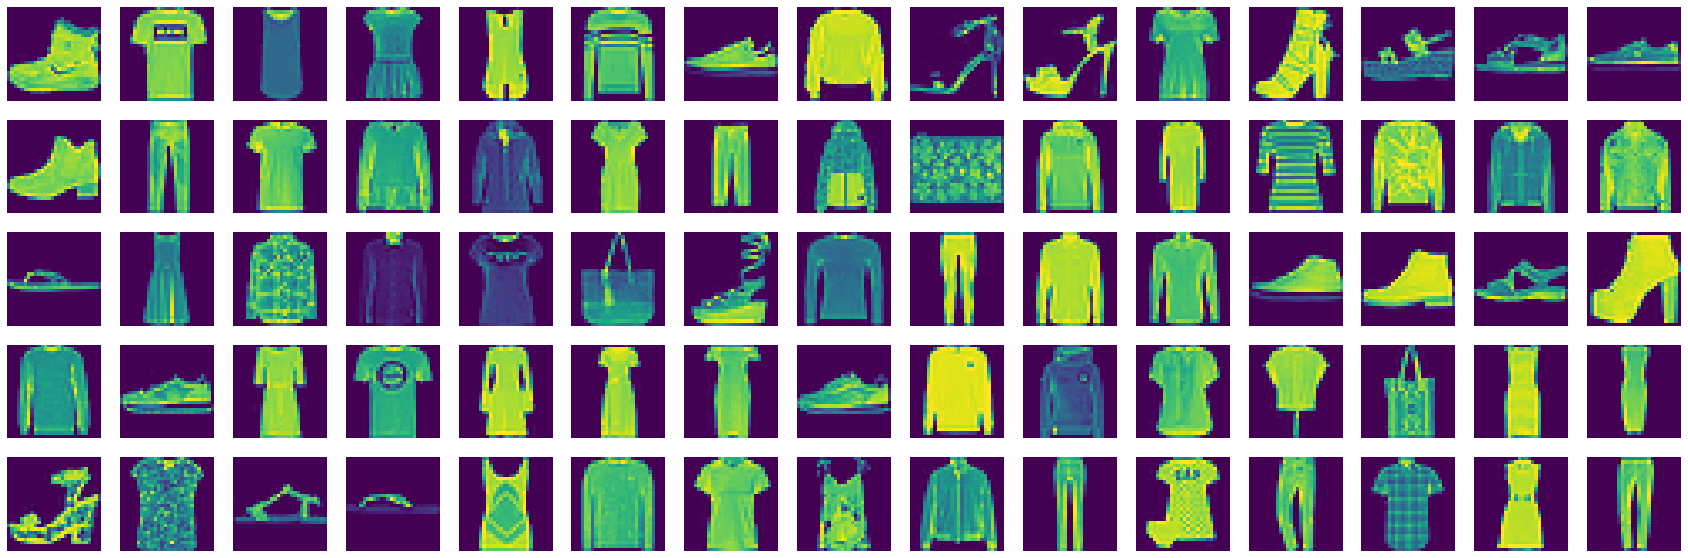

In [3]:
fig = plt.figure(figsize=(30,10))

for i in range(75):

    plt.subplot(5, 15, i+1)

    plt.imshow(X_train[i])
    
    plt.axis('off')

plt.show()

In [4]:
model = Sequential()

model.add(Flatten(input_shape = (28,28) ))
model.add(Dense(512 , activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

In [5]:
# model = tf.keras.models.Sequential([

#   tf.keras.layers.Flatten(input_shape=(28, 28)), # Flatten is important part for CNN.
#   tf.keras.layers.Dense(512, activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax') # We have 10 class and we use softmax because it works good on Multi-Classing.
# ])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

In [8]:
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, validation_split = 0.1 , batch_size = 128 , epochs = 20)

Epoch 1/20
422/422 [==============================] - 3s 4ms/step - loss: 0.5184 - accuracy: 0.8201 - val_loss: 0.4305 - val_accuracy: 0.8472
Epoch 2/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3773 - accuracy: 0.8661 - val_loss: 0.3553 - val_accuracy: 0.8717
Epoch 3/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3347 - accuracy: 0.8790 - val_loss: 0.3537 - val_accuracy: 0.8705
Epoch 4/20
422/422 [==============================] - 2s 4ms/step - loss: 0.3089 - accuracy: 0.8866 - val_loss: 0.3271 - val_accuracy: 0.8813
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2896 - accuracy: 0.8940 - val_loss: 0.3421 - val_accuracy: 0.8752
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2726 - accuracy: 0.8991 - val_loss: 0.3244 - val_accuracy: 0.8835
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2584 - accuracy: 0.9052 - val_loss: 0.3176 - val_accuracy: 0.8817
Epoch 

In [10]:
model.history.history

{'loss': [0.5184068083763123,
  0.37727975845336914,
  0.3347230553627014,
  0.3089269697666168,
  0.28963884711265564,
  0.27257040143013,
  0.2583865821361542,
  0.2493005096912384,
  0.2363278865814209,
  0.23081721365451813,
  0.2182924598455429,
  0.21083121001720428,
  0.20262514054775238,
  0.19570426642894745,
  0.18870417773723602,
  0.18238364160060883,
  0.1784389466047287,
  0.1695609986782074,
  0.16412875056266785,
  0.15959414839744568],
 'accuracy': [0.8200740814208984,
  0.8660926222801208,
  0.8789629340171814,
  0.8866481184959412,
  0.8940185308456421,
  0.8990926146507263,
  0.9052407145500183,
  0.9070740938186646,
  0.912851870059967,
  0.9143703579902649,
  0.9187777638435364,
  0.9222962856292725,
  0.9247221946716309,
  0.9269258975982666,
  0.9306851625442505,
  0.933555543422699,
  0.9339444637298584,
  0.9378703832626343,
  0.939129650592804,
  0.9417592883110046],
 'val_loss': [0.4304788112640381,
  0.35525086522102356,
  0.3536820411682129,
  0.3270893096

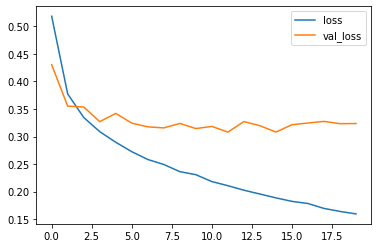

In [11]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

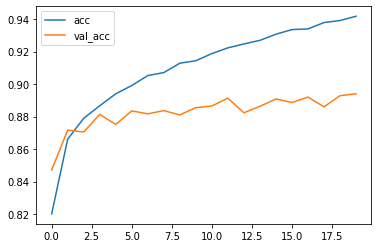

In [14]:
plt.plot(model.history.history['accuracy'], label='acc')
plt.plot(model.history.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8972


[0.33693090081214905, 0.8971999883651733]

In [16]:
y_pred = model.predict(X_test)
y_pred # Softmax telling us probability of all classes.

313/313 [==============================] - 0s 1ms/step


array([[3.86458376e-09, 4.67501204e-10, 2.94399904e-09, ...,
        3.21946020e-04, 2.91428792e-09, 9.99325514e-01],
       [1.07304069e-04, 6.94136817e-17, 9.99553740e-01, ...,
        3.70461517e-12, 1.44202781e-12, 4.60876075e-13],
       [5.48407882e-11, 1.00000000e+00, 1.44016429e-12, ...,
        1.34576553e-22, 9.41831943e-15, 1.18206384e-17],
       ...,
       [4.82861324e-08, 3.49936486e-12, 6.05597217e-09, ...,
        4.18554613e-09, 9.99989748e-01, 1.39242310e-13],
       [2.57217136e-10, 9.99999881e-01, 6.10815981e-11, ...,
        9.04600086e-17, 2.46925841e-10, 3.76412768e-14],
       [7.93922482e-07, 2.00657411e-08, 5.10630298e-06, ...,
        1.49333687e-03, 2.17120250e-05, 5.05220839e-07]], dtype=float32)

In [17]:
y_pred[0] # % 99 last class.

array([3.8645838e-09, 4.6750120e-10, 2.9439990e-09, 1.5505863e-12,
       8.8649879e-09, 3.5249695e-04, 2.8795006e-09, 3.2194602e-04,
       2.9142879e-09, 9.9932551e-01], dtype=float32)

In [20]:
y_pred = model.predict(X_test).argmax(axis=1) # We get maximum probabilities
y_pred

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [21]:
import random as rd

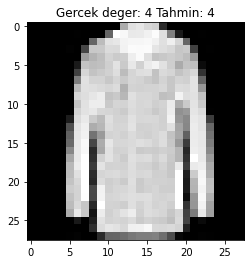

In [22]:
i = rd.randint(0, 9999)
plt.imshow(X_test[i], cmap='gray')

plt.title(f"Gercek deger: {y_test[i]} Tahmin: {y_pred[i]}");

In [ ]:
# Done.